1.  Объясните  концепцию  шумоподавления  в  обработке  изображений  и  роль 
свёртки  в  этом  процессе.  Каковы  основные  виды  шума,  с  которыми 
сталкиваются  при  обработке  изображений,  и  как  применяется  свёртка  для 
уменьшения шума? Приведите примеры использования линейных фильтров и их 
влияние на изображение. 
2.  Реализуйте фильтр Собеля для выделения границ объектов на изображении и 
примените его к тестовому изображению.

Удаление шума. Целью является устранение
или уменьшение шумов или перегруженных
пикселей в изображении, сохраняя при этом
наиболее важную информацию.

Свёртка — это операция, при которой каждый пиксель изображения заменяется взвешенной суммой значений его соседей. Это позволяет сгладить шум, усредняя значения пикселей в локальной области.

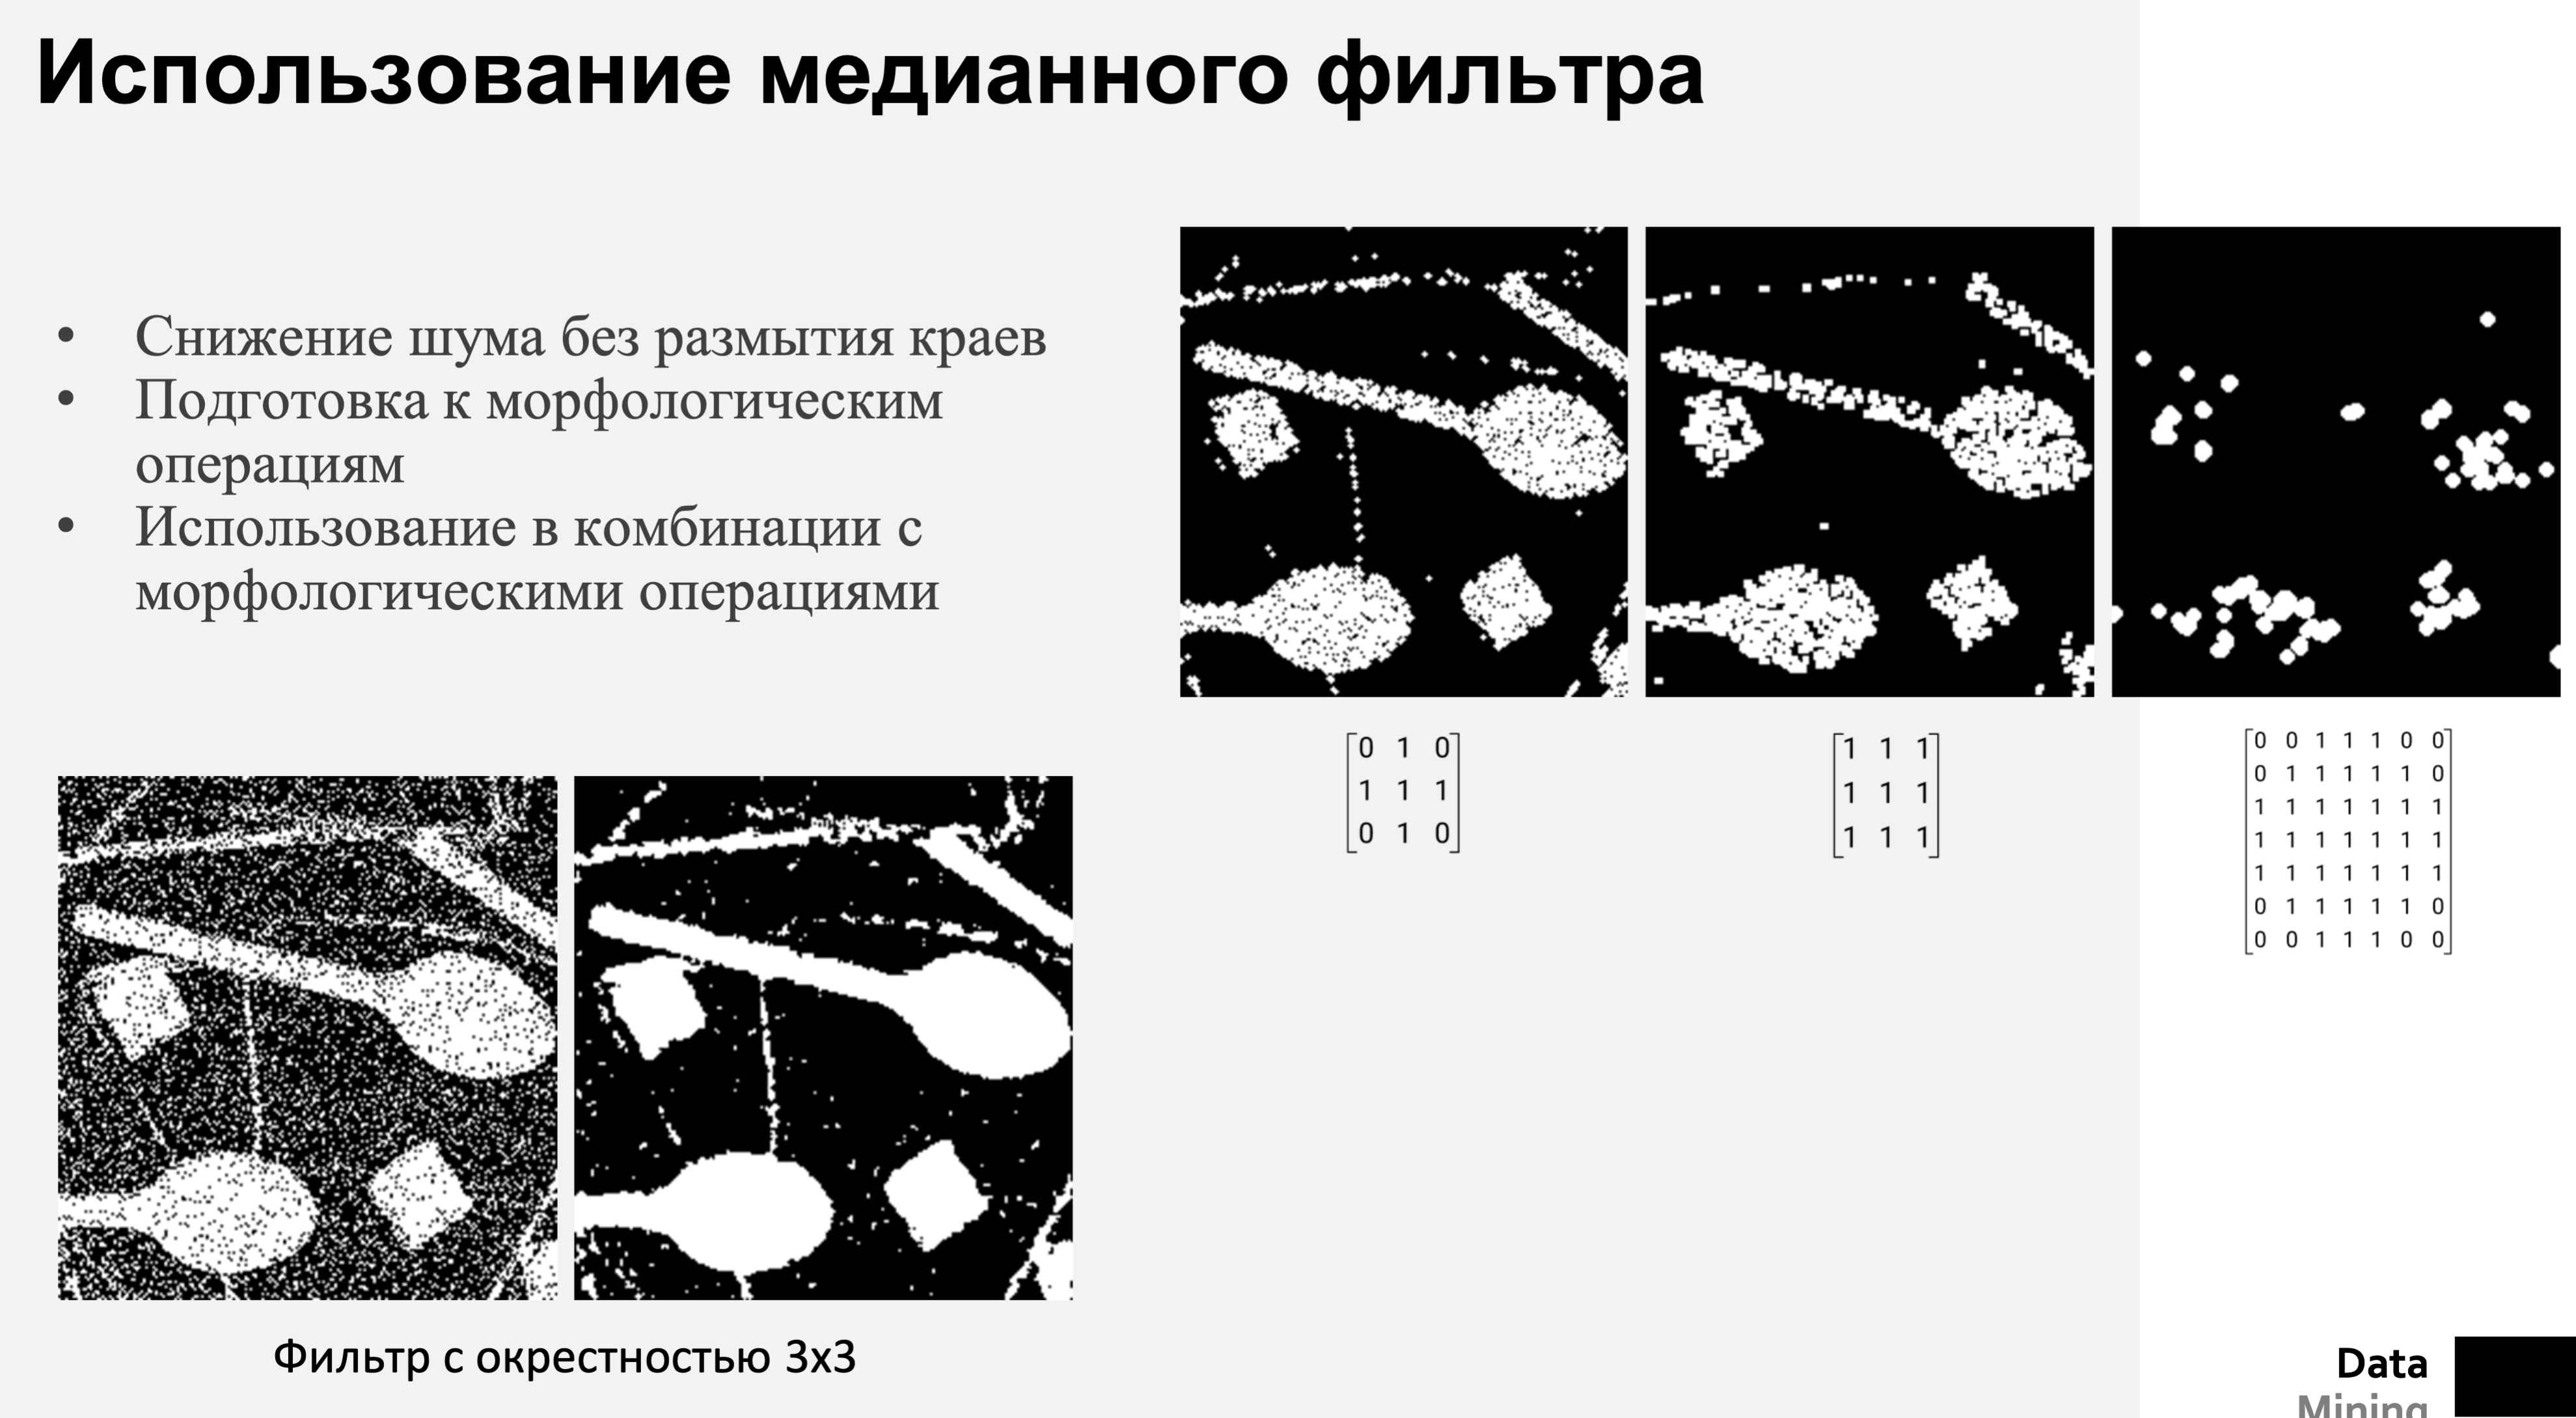

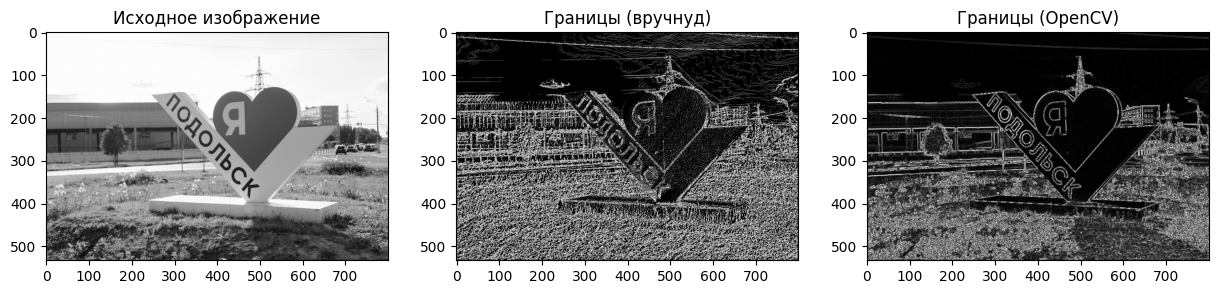

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./data/RANSAC/RANSAC2.jpg', cv2.IMREAD_GRAYSCALE)  # Укажите путь к вашему изображению

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)


def apply_sobel(image, kernel):
    return cv2.filter2D(image, -1, kernel)

gradient_x = apply_sobel(image, sobel_x)  
gradient_y = apply_sobel(image, sobel_y)  

gradient = np.sqrt(gradient_x**2 + gradient_y**2)
gradient = np.uint8(gradient)


sobel_x_cv = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_cv = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
gradient_cv = np.sqrt(sobel_x_cv**2 + sobel_y_cv**2)
gradient_cv = np.uint8(gradient_cv)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')

plt.subplot(1, 3, 2)
plt.imshow(gradient, cmap='gray')
plt.title('Границы (вручнуд)')

plt.subplot(1, 3, 3)
plt.imshow(gradient_cv, cmap='gray')
plt.title('Границы (OpenCV)')

plt.show()